### Проект 4 [Стоимость мобильного телефона]

Вам предоставляется набор данных. Набор данных уже разделен на ```train_data.csv``` и ```test_data.csv```.

**Цель:** построить модели для прогнозирования **диапазона цен** на мобильные телефоны. (```"price_range"```).

    > 0 (низкая цена)
    > 1 (средняя цена)
    > 2 (высокая цена)
    > 3 (очень высокая цена)

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных, и Exploratory Data Analysis

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик классификации: ```F-score```, ```Precision```, ```Recall```.

**Примечание:** вам **рекомендуется** искать так же другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле ```test_data.csv```.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics

In [2]:
test_data = pd.read_csv('test_data.csv')
train_data = pd.read_csv('train_data.csv')
data = pd.concat([test_data,train_data],axis=0)

In [3]:
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1701     1          1.6         1   3       0          10    0.3   
1           1484     0          3.0         0   3       0          12    0.6   
2            555     1          0.5         1   2       0          17    0.2   
3            586     0          2.8         0   2       0          15    0.2   
4            980     1          0.5         0   0       1          33    0.9   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        194        8  ...        550      1338  2598    12     9          6   
1        134        3  ...        916       969  1457    14     4         20   
2        163        5  ...        956      1010   343    19    14          3   
3         83        3  ...        241       854  2592    12     8          3   
4        160        6  ...       1008      1758  2268     7     5          4   

   three_g  touch_screen  wifi  price_range  
0        0             1     0            2  
1        1             1     0            1  
2        0             1     1            0  
3        0             0     0            1  
4        1             1     0            2  

[5 rows x 21 columns]

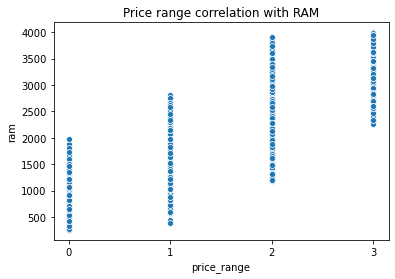

In [4]:
sns.scatterplot(x='price_range',y='ram',data=data)
plt.title('Price range correlation with RAM')
plt.xticks([0,1,2,3])
plt.show()

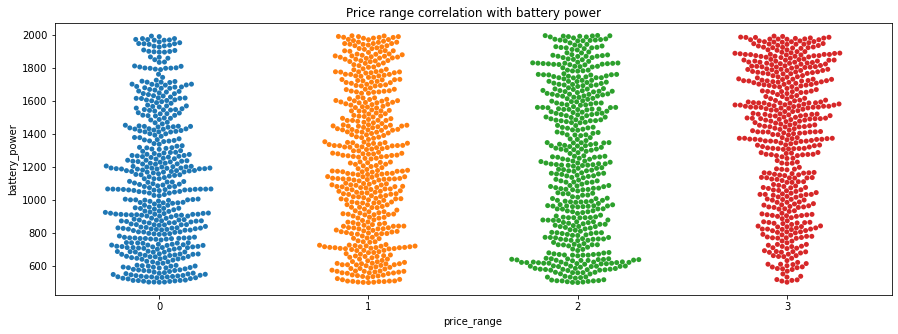

In [26]:
plt.rcParams['figure.figsize']=(15,5);
sns.swarmplot(x='price_range',y='battery_power',data=data)
plt.title('Price range correlation with battery power')
plt.xticks([0,1,2,3])
plt.show()

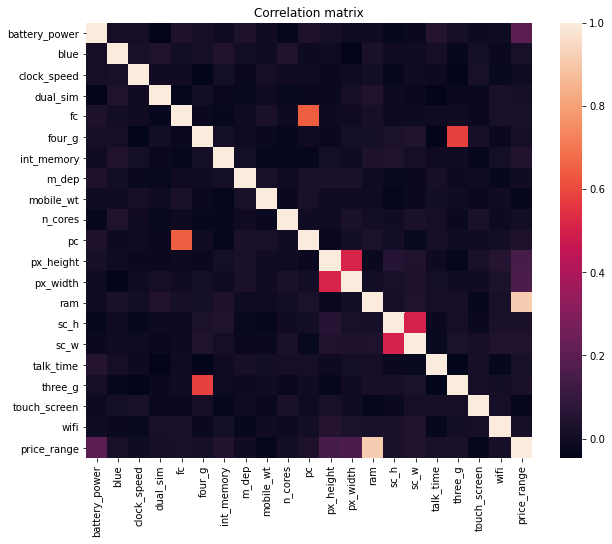

In [28]:
plt.rcParams['figure.figsize']=(10,8);
sns.heatmap(data.corr())
plt.title('Correlation matrix')
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
data.corr().unstack()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
dtype: float64

In [9]:
x_train = train_data.loc[:, train_data.columns != 'price_range']
y_train = train_data['price_range']

x_test = test_data.loc[:, test_data.columns != 'price_range']
y_test = test_data['price_range']

### Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_2 = dtc.predict(x_test)

In [12]:
f_score = metrics.f1_score(y_test,pred_2,average='weighted')
precision = metrics.precision_score(y_test,pred_2,average='weighted')
recall = metrics.recall_score(y_test,pred_2,average='weighted')

print(f'F-Score: {f_score*100:.2f}%')
print(f'Precision score: {precision*100:.2f}%')
print(f'Recall score: {recall*100:.2f}%')

F-Score: 82.06%
Precision score: 82.77%
Recall score: 82.00%


### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
logistic_pred = lr.predict(x_test)

In [15]:
f_score_logistic = metrics.f1_score(y_test,logistic_pred,average='weighted')
precision_logistic = metrics.precision_score(y_test,logistic_pred,average='weighted')
recall_logistic = metrics.recall_score(y_test,logistic_pred,average='weighted')

print(f'F-Score: {f_score_logistic*100:.2f}%')
print(f'Precision score: {precision_logistic*100:.2f}%')
print(f'Recall score: {recall_logistic*100:.2f}%')

F-Score: 63.80%
Precision score: 64.58%
Recall score: 63.50%


### K-Neighbors Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
k = KNeighborsClassifier()
k.fit(x_train,y_train)
k_pred = k.predict(x_test)

In [18]:
f_neighbors = metrics.f1_score(y_test,k_pred,average='weighted')
precision_neighbors = metrics.precision_score(y_test,k_pred,average='weighted')
recall_neighbors = metrics.recall_score(y_test,k_pred,average='weighted')

print(f'F-Score: {f_neighbors*100:.2f}%')
print(f'Precision score: {precision_neighbors*100:.2f}%')
print(f'Recall score: {recall_neighbors*100:.2f}%')

F-Score: 93.49%
Precision score: 93.52%
Recall score: 93.50%


### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
forest_pred = forest.predict(x_test)

In [21]:
f_forest = metrics.f1_score(y_test,forest_pred,average='weighted')
precision_forest = metrics.precision_score(y_test,forest_pred,average='weighted')
recall_forest = metrics.recall_score(y_test,forest_pred,average='weighted')

print(f'F-Score: {f_forest*100:.2f}%')
print(f'Precision score: {precision_forest*100:.2f}%')
print(f'Recall score: {recall_forest*100:.2f}%')

F-Score: 90.58%
Precision score: 90.82%
Recall score: 90.50%


### SVC Classifier

In [22]:
from sklearn.svm import SVC

In [23]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

In [24]:
f_svc = metrics.f1_score(y_test,svc_pred,average='weighted')
precision_svc = metrics.precision_score(y_test,svc_pred,average='weighted')
recall_svc = metrics.recall_score(y_test,svc_pred,average='weighted')

print(f'F-Score: {f_svc*100:.2f}%')
print(f'Precision score: {precision_svc*100:.2f}%')
print(f'Recall score: {recall_svc*100:.2f}%')

F-Score: 95.96%
Precision score: 96.07%
Recall score: 96.00%


### Visualization of metrics

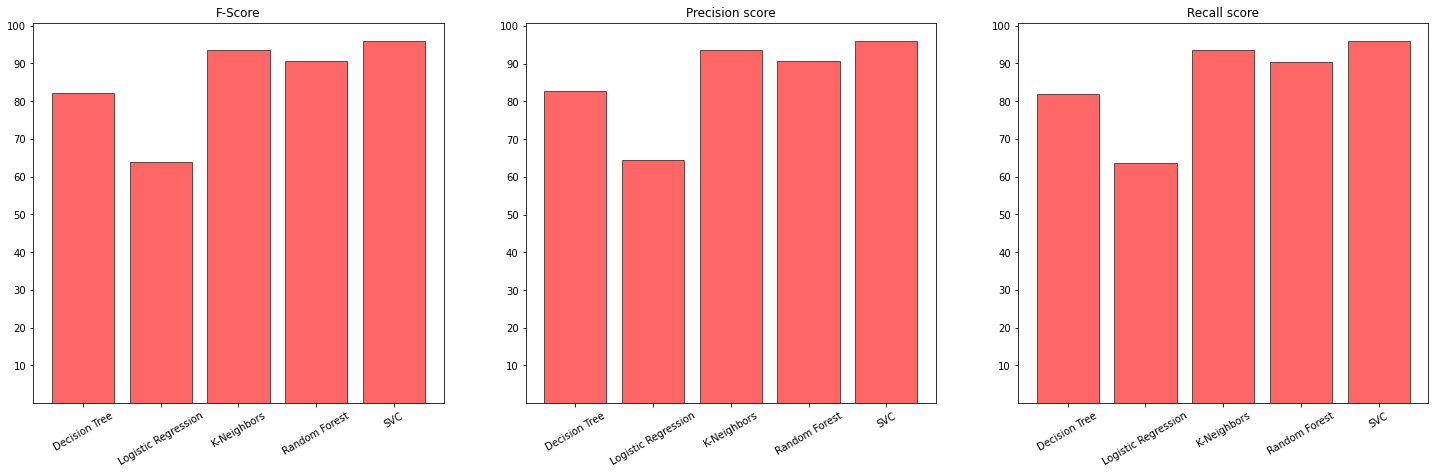

In [25]:
plt.rcParams['figure.figsize']=(25,7);
fig,axs = plt.subplots(1,3)

ticks = ['Decision Tree','Logistic Regression','K-Neighbors','Random Forest','SVC']
f_params = [f_score,f_score_logistic,f_neighbors,f_forest,f_svc]
precision_params = [precision,precision_logistic,precision_neighbors,precision_forest,precision_svc]
recall_params = [recall,recall_logistic,recall_neighbors,recall_forest,recall_svc]

axs[0].bar(ticks,height=[i*100 for i in f_params],alpha=0.6,color='r',edgecolor='k')
axs[0].set_title('F-Score')
axs[0].set_xticklabels(labels=ticks,rotation=30)
axs[0].set_yticks([10,20,30,40,50,60,70,80,90,100])

axs[1].bar(ticks,height=[i*100 for i in precision_params],alpha=0.6,color='r',edgecolor='k')
axs[1].set_title('Precision score')
axs[1].set_xticklabels(labels=ticks,rotation=30)
axs[1].set_yticks([10,20,30,40,50,60,70,80,90,100])

axs[2].bar(ticks,height=[i*100 for i in recall_params],alpha=0.6,color='r',edgecolor='k')
axs[2].set_title('Recall score')
axs[2].set_xticklabels(labels=ticks,rotation=30)
axs[2].set_yticks([10,20,30,40,50,60,70,80,90,100])

plt.show()